In [1]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
# get expedia & test csv files as a DataFrame
expedia_df = pd.read_csv('input/train.csv', nrows=10000)
test_df    = pd.read_csv('input/test.csv')

# preview the data
expedia_df.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [3]:
expedia_df.info()
print("----------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
date_time                    10000 non-null object
site_name                    10000 non-null int64
posa_continent               10000 non-null int64
user_location_country        10000 non-null int64
user_location_region         10000 non-null int64
user_location_city           10000 non-null int64
orig_destination_distance    6271 non-null float64
user_id                      10000 non-null int64
is_mobile                    10000 non-null int64
is_package                   10000 non-null int64
channel                      10000 non-null int64
srch_ci                      9993 non-null object
srch_co                      9993 non-null object
srch_adults_cnt              10000 non-null int64
srch_children_cnt            10000 non-null int64
srch_rm_cnt                  10000 non-null int64
srch_destination_id          10000 non-null int64
srch_destination_type_id     10000 non-n

In [4]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
expedia_df = expedia_df.drop(['date_time','site_name', 'user_location_region', 'user_location_city', 'orig_destination_distance', 
                              'user_id', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'cnt'], axis=1)
test_df    = test_df.drop(['date_time','site_name', 'user_location_region', 'user_location_city', 'orig_destination_distance', 
                              'user_id', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt'], axis=1)

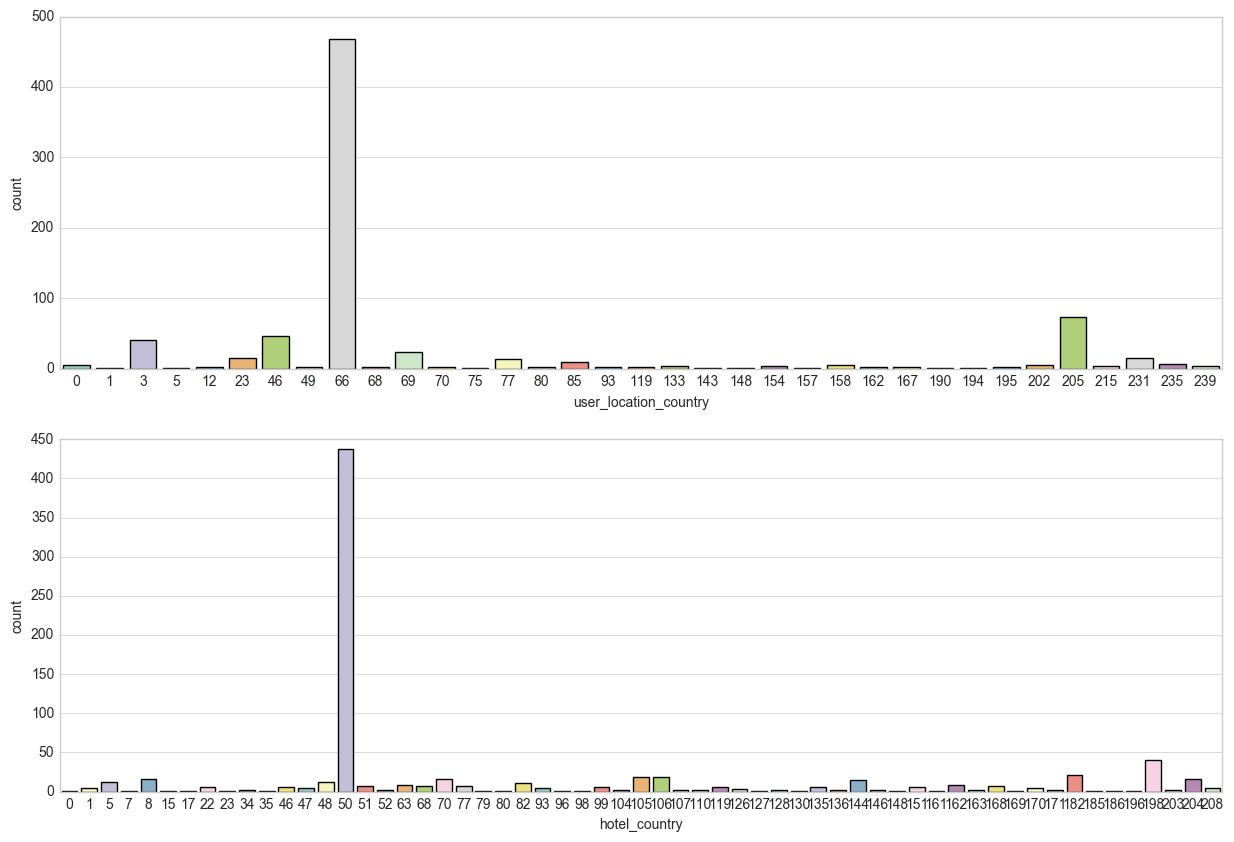

In [5]:
# Plot 

fig, (axis1,axis2) = plt.subplots(2,1,figsize=(15,10))

bookings_df = expedia_df[expedia_df["is_booking"] == 1]

# What are the most countries the customer travel from?
sns.countplot('user_location_country',data=bookings_df.sort_values(by=['user_location_country']),ax=axis1,palette="Set3")

# What are the most countries the customer travel to?
sns.countplot('hotel_country',data=bookings_df.sort_values(by=['hotel_country']),ax=axis2,palette="Set3")

# Combine both plots
# fig, (axis1) = plt.subplots(1,1,figsize=(15,5))

# sns.distplot(bookings_df["hotel_country"], kde=False, rug=False, bins=25, ax=axis1)
# sns.distplot(bookings_df["user_location_country"], kde=False, rug=False, bins=25, ax=axis1)

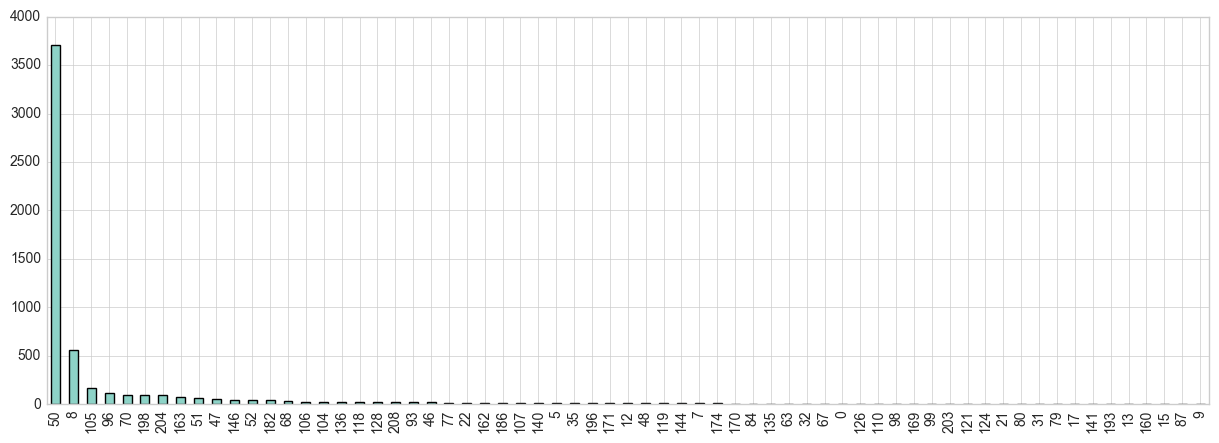

In [6]:
# Where do most of the customers from a country travel?
user_country_id = 66

fig, (axis1) = plt.subplots(1,1,figsize=(15,10))

country_customers = expedia_df[expedia_df["user_location_country"] == user_country_id]
country_customers["hotel_country"].value_counts().plot(kind='bar',colormap="Set3",figsize=(15,5))

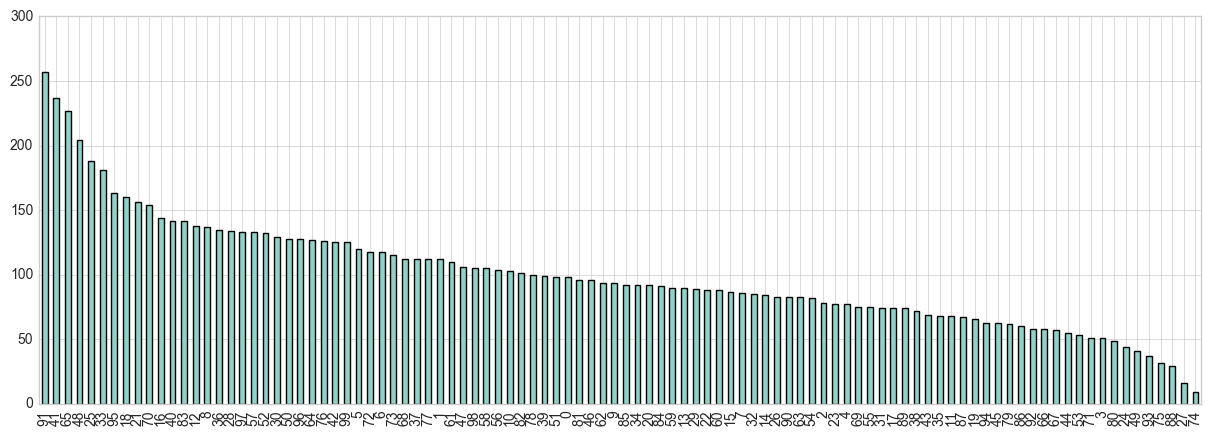

In [7]:
# Plot frequency for each hotel_clusters

expedia_df["hotel_cluster"].value_counts().plot(kind='bar',colormap="Set3",figsize=(15,5))

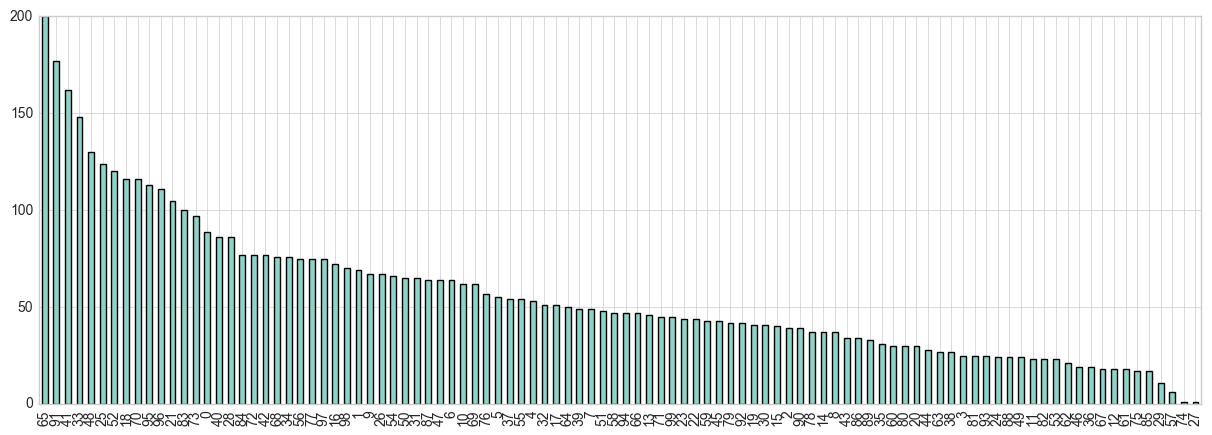

In [8]:
# What are the most frequent hotel clusters booked by customers from a country?
user_country_id = 66

fig, (axis1) = plt.subplots(1,1,figsize=(15,10))

customer_clusters = expedia_df[expedia_df["user_location_country"] == user_country_id]["hotel_cluster"]
customer_clusters.value_counts().plot(kind='bar',colormap="Set3",figsize=(15,5))

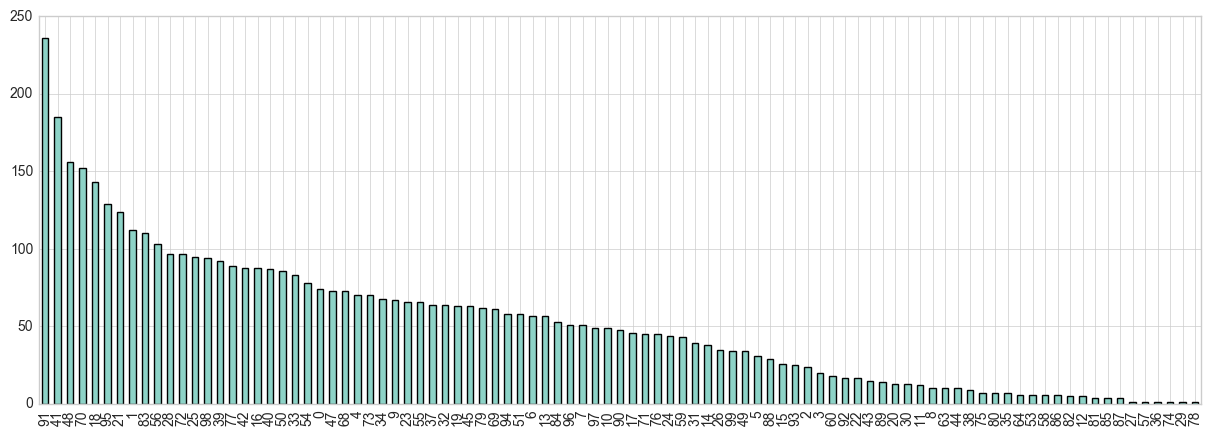

In [9]:
# What are the most frequent hotel clusters in a country?
country_id = 50

fig, (axis1) = plt.subplots(1,1,figsize=(15,10))

country_clusters = expedia_df[expedia_df["hotel_country"] == country_id]["hotel_cluster"]
country_clusters.value_counts().plot(kind='bar',colormap="Set3",figsize=(15,5))

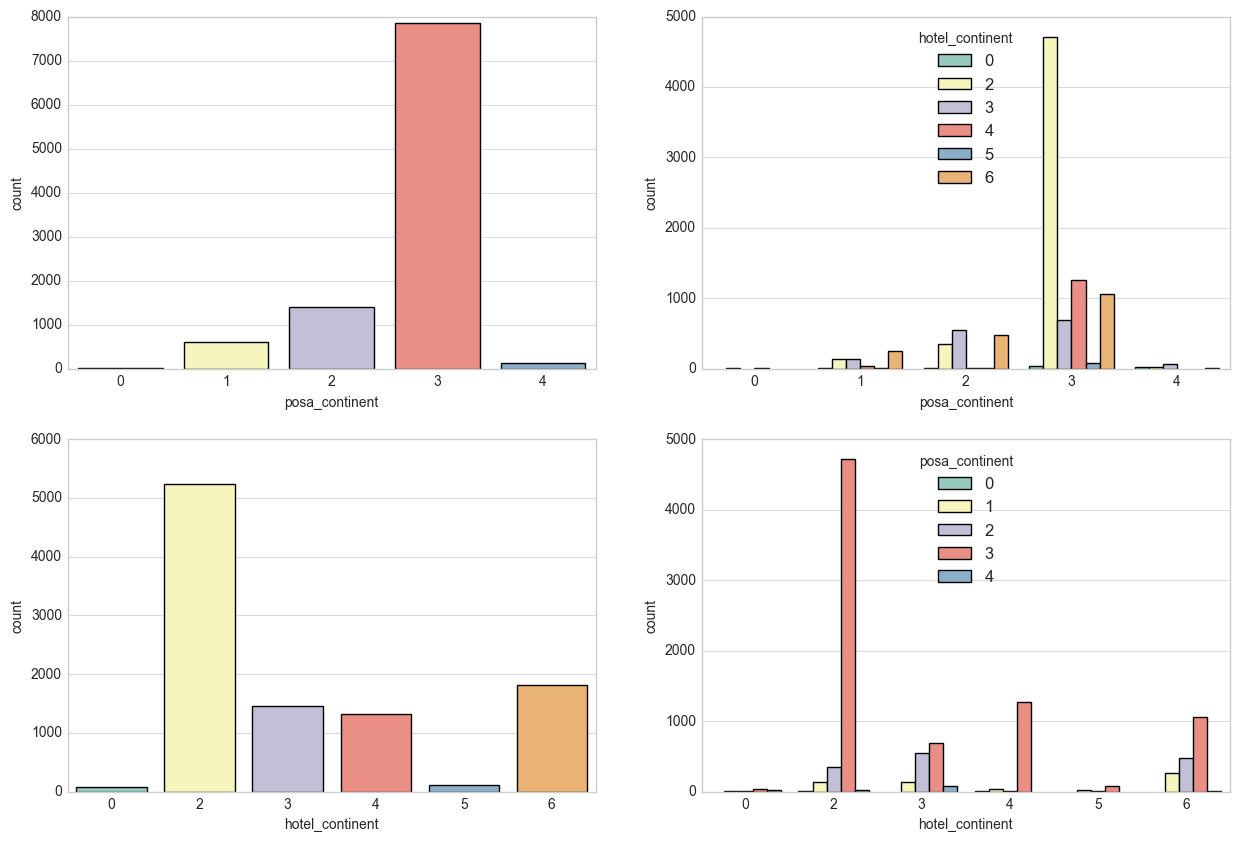

In [10]:
# Plot post_continent & hotel_continent

fig, ((axis1,axis2),(axis3,axis4)) = plt.subplots(2,2,figsize=(15,10))

# Plot frequency for each posa_continent
sns.countplot('posa_continent', data=expedia_df,order=[0,1,2,3,4],palette="Set3",ax=axis1)

# Plot frequency for each posa_continent decomposed by hotel_continent
sns.countplot('posa_continent', hue='hotel_continent',data=expedia_df,order=[0,1,2,3,4],palette="Set3",ax=axis2)

# Plot frequency for each hotel_continent
sns.countplot('hotel_continent', data=expedia_df,order=[0,2,3,4,5,6],palette="Set3",ax=axis3)

# Plot frequency for each hotel_continent decomposed by posa_continent
sns.countplot('hotel_continent', hue='posa_continent', data=expedia_df, order=[0,2,3,4,5,6],palette="Set3",ax=axis4)

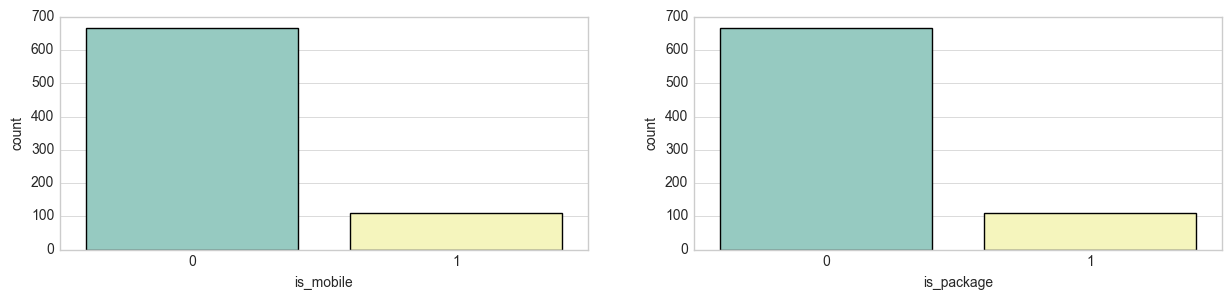

In [11]:
# Plot frequency of is_mobile & is_package

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,3))

# What's the frequency of bookings through mobile?
sns.countplot(x='is_mobile',data=bookings_df, order=[0,1], palette="Set3", ax=axis1)

# What's the frequency of bookings with package?
sns.countplot(x='is_package',data=bookings_df, order=[0,1], palette="Set3", ax=axis2)

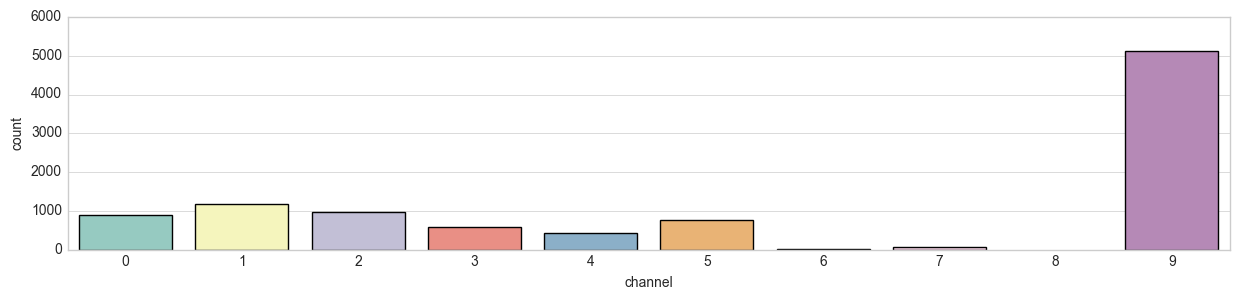

In [12]:
# What's the most impactful channel?

fig, (axis1) = plt.subplots(1,1,figsize=(15,3))

sns.countplot(x='channel', order=list(range(0,10)), data=expedia_df, palette="Set3")

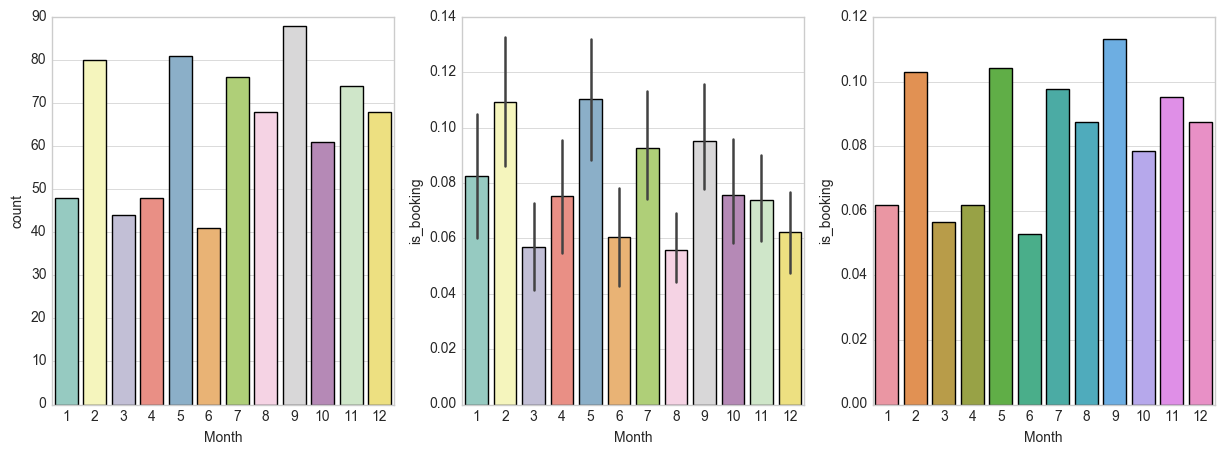

In [13]:
# Convert srch_ci to Year, Month, and Week

expedia_df['Year']   = expedia_df['srch_ci'].apply(lambda x: int(str(x)[:4]) if x == x else np.nan)
expedia_df['Month']  = expedia_df['srch_ci'].apply(lambda x: int(str(x)[5:7]) if x == x else np.nan)
expedia_df['Week']   = expedia_df['srch_ci'].apply(lambda x: int(str(x)[8:10]) if x == x else np.nan)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,sharex=True,figsize=(15,5))

# Plot How many bookings in each month
sns.countplot('Month',data=expedia_df[expedia_df["is_booking"] == 1],order=list(range(1,13)),palette="Set3",ax=axis1)

# Plot The percentage of bookings of each month(sum of month bookings / count of bookings(=1 OR =0) of a month)
# sns.factorplot('Month',"is_booking",data=expedia_df, order=list(range(1,13)), palette="Set3",ax=axis2)
sns.barplot('Month',"is_booking",data=expedia_df, order=list(range(1,13)), palette="Set3",ax=axis2)

# Plot The percentage of bookings of each month compared to all bookings(sum of month bookings / count of bookings(=1) of all months)
month_sum = expedia_df[['Month', 'is_booking']].groupby(['Month'],as_index=False).sum()
month_sum['is_booking'] = month_sum['is_booking'] / len(expedia_df[expedia_df['is_booking'] == 1])

sns.barplot(x='Month', y='is_booking', order=list(range(1,13)), data=month_sum,ax=axis3) 

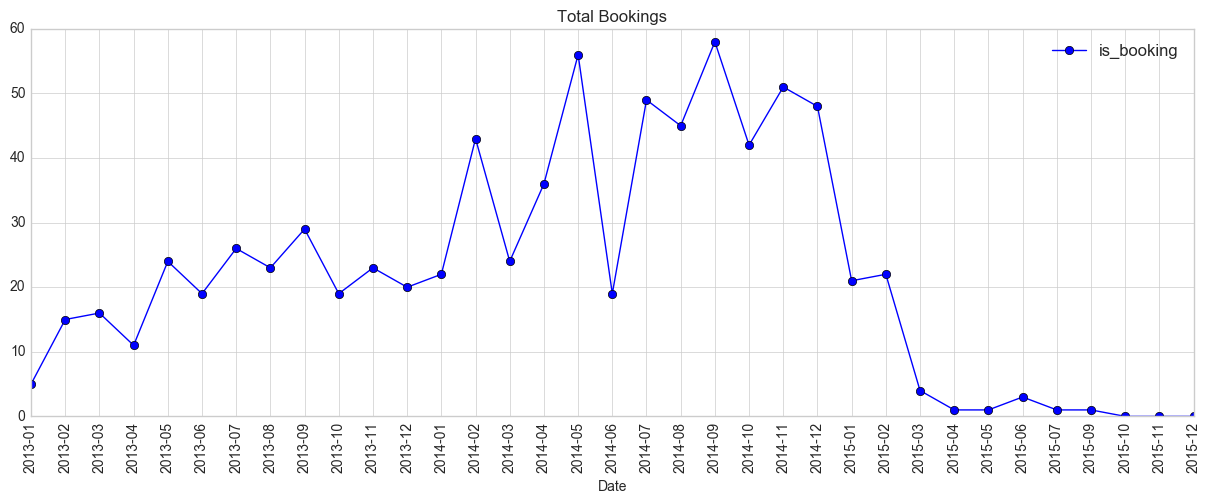

In [14]:
# Convert srch_ci column to Date(Y-M)
expedia_df['Date']  = expedia_df['srch_ci'].apply(lambda x: (str(x)[:7]) if x == x else np.nan)

# Plot number of bookings over Date
date_bookings  = expedia_df.groupby('Date')["is_booking"].sum()
ax1 = date_bookings.plot(legend=True,marker='o',title="Total Bookings", figsize=(15,5)) 
ax1.set_xticks(range(len(date_bookings)))
xlabels = ax1.set_xticklabels(date_bookings.index.tolist(), rotation=90)

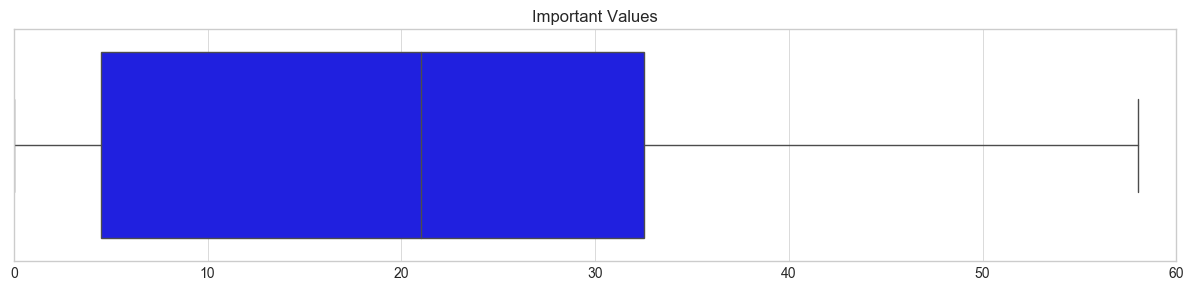

In [15]:
# .... continue with plot Date column

# Plot important values(min,max,quartiles) for number of bookings over Date
fig, (axis1) = plt.subplots(1,1,figsize=(15,3))

ax2 = sns.boxplot([date_bookings.values], whis=np.inf,ax=axis1)
ax2.set_title('Important Values')

In [16]:
# Correlation between hotel_country in number of bookings through 2013, 2014, & 2015

hotel_country_piv       = pd.pivot_table(expedia_df,values='is_booking', index='Date', columns=['hotel_country'],aggfunc='sum')
hotel_country_piv       = hotel_country_piv.fillna(0)
print(hotel_country_piv)

hotel_country  0    1    5    7    8    9    11   12   13   15  ...   182  \
Date                                                            ...         
2013-01        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
2013-02        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
2013-03        0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
2013-04        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   1.0   
2013-05        0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0 ...   2.0   
2013-06        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   1.0   
2013-07        0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0 ...   2.0   
2013-08        1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
2013-09        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0 ...   0.0   
2013-10        0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
2013-11        0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   

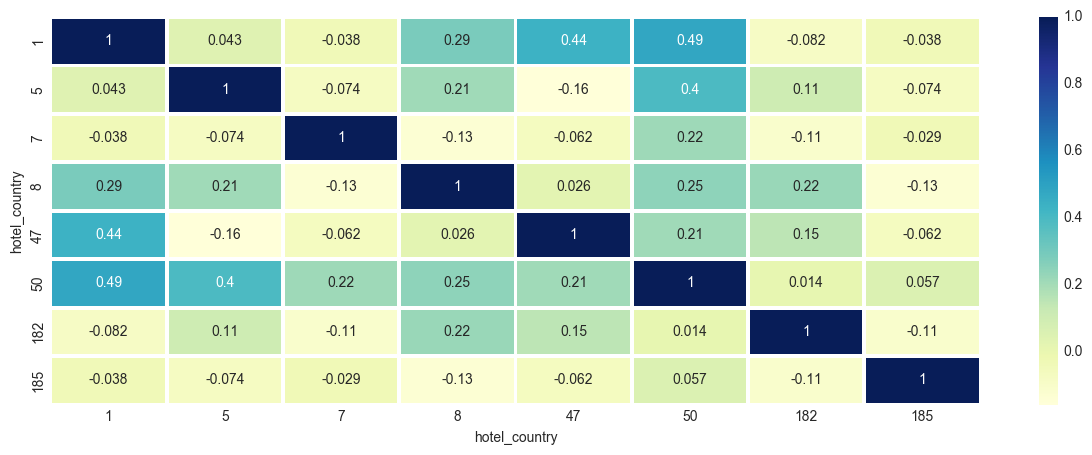

In [17]:
# .... continue Correlation

# Plot correlation between range of hotel_country
country_ids = [1,5,7,8,47,50,182,185]

fig, (axis1) = plt.subplots(1,1,figsize=(15,5))

# using summation of booking values for each hotel_country 
sns.heatmap(hotel_country_piv[country_ids].corr(),annot=True,linewidths=2,cmap="YlGnBu")

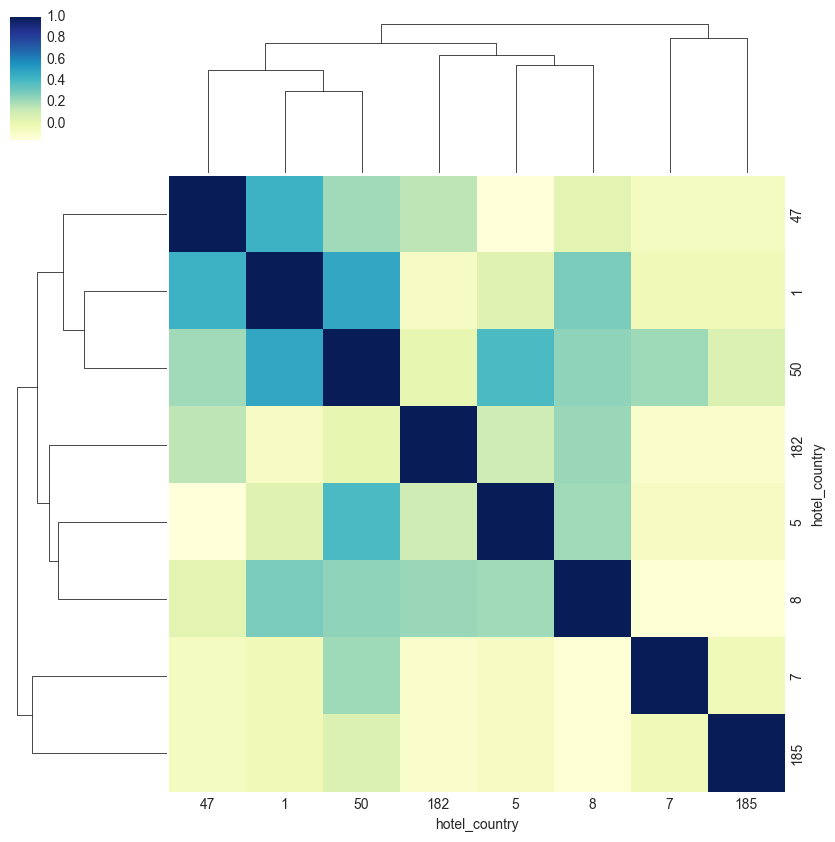

In [18]:
# .... continue Correlation

# Reformat the heatmap so similar hotel_country are next to each other
sns.clustermap(hotel_country_piv[country_ids].corr(), cmap="YlGnBu")

In [19]:
# Define training and testing sets

train_df = pd.read_csv('input/train.csv', usecols=['is_booking', 'srch_destination_id', 'hotel_cluster'])
test_df  = test_df[['id', 'srch_destination_id']]

In [21]:
# Group by srch_destination_id & hotel_cluster
# Then for each destination id & hotel cluster, compute summation of bookings, and count number of clicks(no-booking)

train_df = train_df.groupby(['srch_destination_id','hotel_cluster'])['is_booking'].agg(['sum','count'])
train_df['count'] = train_df['count'] - train_df['sum']
train_df.rename(columns={'sum': 'sum_bookings', 'count': 'clicks'}, inplace=True)

# For each destination id & hotel cluster, 
# the relevance will be the number of bookings made + number of clicks(no-bookings) * 0.1
# meaning for every 10 clicks, they will be counted as 1 booking

train_df['relevance'] = train_df['sum_bookings'] + (train_df['clicks'] * 0.1)

In [22]:
# For each srch_destination_id group, get top 5 hotel clusters with max relevance

def get_top_clusters(group):
    indexes      = group.relevance.nlargest(5).index
    top_clusters = group.hotel_cluster[indexes].values
    if(len(top_clusters) < 5):
        top_clusters = (list(top_clusters) + list(ferq_clusters.index))[:5]
    return np.array_str(np.array(top_clusters))[1:-1]

train_df      = train_df.reset_index()
ferq_clusters = train_df['hotel_cluster'].value_counts()[:5]
top_clusters  = train_df.groupby(['srch_destination_id']).apply(get_top_clusters)
print("done")

done


In [23]:
# Create top_clusters_df

top_clusters_df = pd.DataFrame(top_clusters).rename(columns={0: 'hotel_cluster'})
top_clusters_df.head()

,hotel_cluster
srch_destination_id,
0,3 30 20 85 3
1,20 30 60 57 30
2,20 30 5 38 41
3,53 60 30 20 85
4,82 25 32 78 58


In [24]:
# Merge test_df with top_clusters_df

# For every destination id in test_df, merge it with the corresponding id in top_clusters_df 
test_df = pd.merge(test_df, top_clusters_df, how='left',left_on='srch_destination_id', right_index=True)

# Fill NaN values with most frequent clusters
test_df.hotel_cluster.fillna(np.array_str(ferq_clusters.index)[1:-1],inplace=True)

Y_pred = test_df["hotel_cluster"]

In [25]:
# Create submission

submission = pd.DataFrame()
submission["id"]            = test_df["id"]
submission["hotel_cluster"] = Y_pred

submission.to_csv('predictionResult.csv', index=False)

In [ ]:
# IMPORTANT! - Another Method for Hotel Cluster Prediction
# Expedia Hotel Cluster Predictions
# Link: https://www.kaggle.com/omarelgabry/expedia-hotel-recommendations/expedia-hotel-cluster-predictions